In [1]:
import cranet
from cranet import data

import numpy as np
import matplotlib.pyplot as plt

from utils import create_curve, plot_curve

In [21]:
sin = lambda x : 1 + np.sin(np.pi/4 * x)
curve = create_curve(sin, [-2, 2], 30)

Text(0.5, 1.0, '')

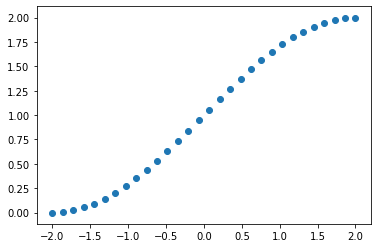

In [22]:
plt.scatter(*curve)
plt.title("")

In [23]:
class CurveDataset(data.Dataset):
    def __init__(self, curvedata, transform=None, target_transform=None):
        self.x, self.y = curvedata
        self.transform = transform
        self.target_transform = target_transform
        assert len(self.x) == len(self.y), "x_data and y_data of the curve data must have same length"

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        x_data = cranet.tensor(self.x[idx].reshape(1))
        y_data = cranet.tensor(self.y[idx].reshape(1))
        if self.transform:
            x_data = self.transform(x_data)
        if self.target_transform:
            y_data = self.target_transform(y_data)
        return x_data, y_data

In [24]:
train_ds = CurveDataset(curve)
train_dl = data.DataLoader(train_ds, shuffle=True)

In [25]:
from model import FNN
fnn = FNN([1, 13, 1])

In [26]:
history = fnn.fit(train_dl, epochs=100)

0/100 loss:0.21073458511826754
10/100 loss:0.016892234930326374
20/100 loss:0.0066929828723177424
30/100 loss:0.0029359214465243828
40/100 loss:0.0014634955155317401
50/100 loss:0.000852322058065664
60/100 loss:0.0005810494829914657
70/100 loss:0.00045043534889035075
80/100 loss:0.000381369738040712
90/100 loss:0.00034106045574467655


Text(0, 0.5, 'loss')

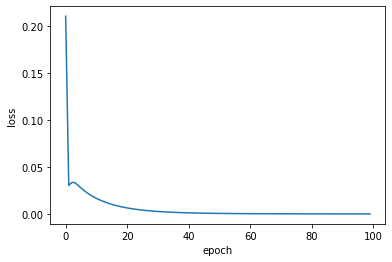

In [27]:
plt.plot(history)
plt.xlabel("epoch")
plt.ylabel("loss")

No handles with labels found to put in legend.


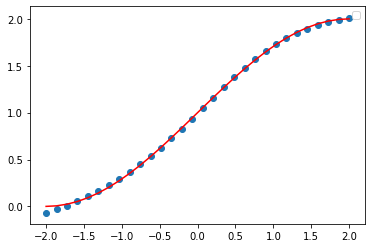

In [28]:
plot_curve(fnn, train_ds)
plt.plot(*curve, 'r')